In [2]:
import pandas as pd

# Load the data
df = pd.read_csv("../data/complaints.csv")

# Check structure
print(df.shape)
df.head()


C:\Users\bigid\AppData\Local\Temp\ipykernel_10180\1969211299.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/complaints.csv")


(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
df.columns.tolist()

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [4]:
target_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later (BNPL)", 
    "Savings account", 
    "Money transfers"
]

# Inspect available product names
df['Product'].value_counts()

# Filter
df = df[df['Product'].isin(target_products)]


In [6]:
# Drop rows with missing complaint text
df = df[df['Consumer complaint narrative'].notnull()]


In [7]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_narrative'] = df['Consumer complaint narrative'].apply(clean_text)


<Axes: title={'center': 'Complaints by Product'}, xlabel='Product'>

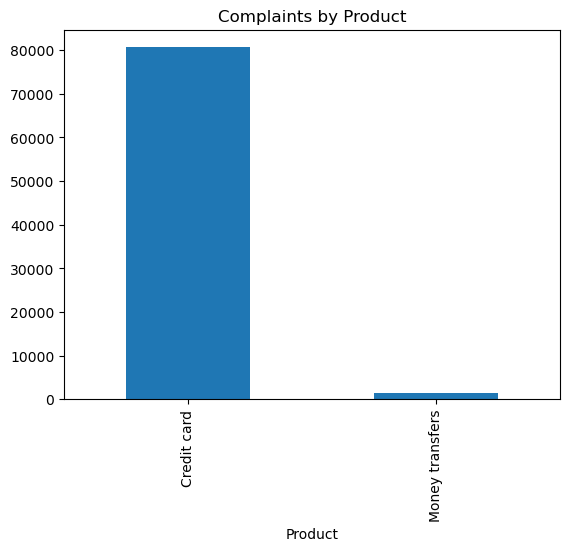

In [8]:
df['Product'].value_counts().plot(kind='bar', title='Complaints by Product')

<Axes: >

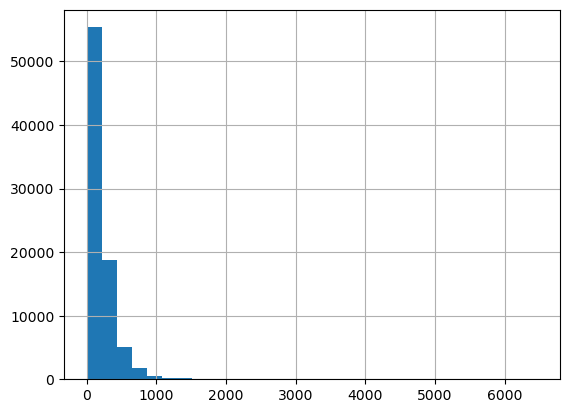

In [9]:
df['narrative_length'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))
df['narrative_length'].hist(bins=30)


In [10]:
print(df['narrative_length'].describe())

count    82164.000000
mean       201.515262
std        220.900036
min          2.000000
25%         64.000000
50%        143.000000
75%        263.000000
max       6472.000000
Name: narrative_length, dtype: float64


In [12]:
df[['Product', 'cleaned_narrative']].to_csv('../data/filtered_complaints.csv', index=False)